<a href="https://colab.research.google.com/github/mujtwa/100-days-of-machine-learning/blob/main/Self_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the Data:
There are two datasets.


*   Play Store data
*   User Review




In [ ]:
df_PlayStore = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone_01_EDA/Play Store Data.csv")
df_UserReview = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone_01_EDA/User Reviews.csv")

In [ ]:
df_PlayStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Final Questions to work

### 1. Find out the app category which application has been installed maximum no. of times.

### 2. What are the factors affecting the maximum downloads?

### 3. Exploring the top 5 highest rated free and paid apps.

### 4. Exploring the avg rating for each category.

### 5. Understanding the sentiment polarity of the users.

## TEEN:
Titles rated T (Teen) have content that may be suitable for ages 13 and older

# Sentiment_subjectivity:
 means that if value is high positive means it has a personal opinion rather than factual information.

 # polarity:
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

# subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

# App Size
The amount of space required to install your app. It measures in Metric or Imperial.

###<u> 1. Find out the app category which application has been installed maximum no. of times.<u>

In [ ]:
df_PlayStore.shape

(10841, 13)

In [ ]:
df_PlayStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_PlayStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

As we can see that in Category. there is 1.9 type of category which is not appropariate. and same we can see in Installs. in Installation we must have numeric values but we can see here 'Free' so this records we need to delete as well.

In [ ]:
df_PlayStore[df_PlayStore['Installs']=='Free'] # bool indexing

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
row_to_drop = list(df_PlayStore[df_PlayStore['Category']=='1.9'].index)

In [ ]:
# As we can see the 10472 index records in not appropriate then just drop this record
df_PlayStore = df_PlayStore.drop(index = row_to_drop,axis = 0 )

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_PlayStore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df_PlayStore.info() # Installs is object type we need to convert it into int and also we need to remove the + sign at the last of each no. of installation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
def formatting_(x):
  """
  This function would take the each element of installs col. and replace , with nothing and change the type of that as well.
  Function_Name : formatting_
  Return : integer type single element at a time
  argument : Take a string

  """
  if x == '0':
    return int(x)  
  x = x[:-1]
  x = x.replace(',','')
  return int(x)

In [ ]:
df_PlayStore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
df_PlayStore['Installs'] = df_PlayStore['Installs'].apply(lambda x : formatting_(x))

In [ ]:
df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs',ascending = False).head(5)

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915


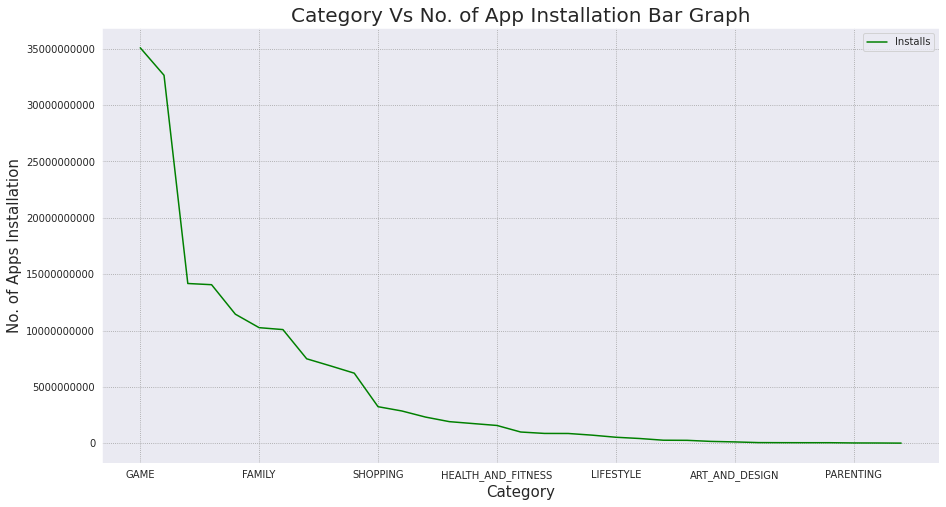

In [ ]:
ax = df_PlayStore.groupby(['Category']).agg({'Installs':'sum'}).sort_values(by = 'Installs', ascending = False).plot(kind = 'line', figsize = (15,8), color = 'green');
ax.set_xlabel("Category", fontsize = 15)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_ylabel("No. of Apps Installation", fontsize = 15)
ax.set_title("Category Vs No. of App Installation Bar Graph", fontsize = 20);
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## INFERENCE:
1. GAME category Apps Has been installed maximum no. of time
2. and you can see in Above Bar graph as well.
3. I formatted the Installs col where you can see the no. of Installs are given in thr form of 2000+ ,453+,450000+ like this. I converted that into 2000,453,450000 only so that later on i can apply some arithmatic and other operations

In [ ]:
df_UserReview.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_PlayStore['App'].value_counts().nlargest(10)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

In [ ]:
df_PlayStore.shape

(10840, 13)

In [ ]:
df_PlayStore.drop_duplicates(inplace=True)

In [ ]:
type(df_PlayStore)

pandas.core.frame.DataFrame

In [ ]:
df_PlayStore.shape

(10357, 13)

In [ ]:
df_PlayStore[df_PlayStore['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
df_PlayStore[df_PlayStore['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [ ]:
df_PlayStore[df_PlayStore['App'] == 'Bubble Shooter']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1657,Bubble Shooter,GAME,4.5,148897,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1711,Bubble Shooter,GAME,4.5,148895,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1875,Bubble Shooter,GAME,4.5,148945,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
1972,Bubble Shooter,GAME,4.5,148990,46M,10000000,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up
2041,Bubble Shooter,FAMILY,4.4,59843,20M,5000000,Free,0,Everyone,Puzzle;Brain Games,"January 9, 2018",2.3.3122,2.3 and up
3894,Bubble Shooter,GAME,4.5,43576,50M,5000000,Free,0,Everyone,Arcade,"September 13, 2017",4.4,2.3 and up


In [ ]:
df_PlayStore[df_PlayStore['App'] == 'Helix Jump']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1663,Helix Jump,GAME,4.2,1497361,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1749,Helix Jump,GAME,4.2,1498648,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1792,Helix Jump,GAME,4.2,1499373,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1918,Helix Jump,GAME,4.2,1500999,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1969,Helix Jump,GAME,4.2,1500622,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
4182,Helix Jump,GAME,4.2,1485806,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up


## INFERENCE:
As You can see that single app is repeating multiple times. so we need to take only single app. we would not want to take multiple app records because there is no scence to take all  apps but these are not duplicate but only changes in Category and Reviews. So on the bases of some criteria. i need to take only single records of app.and we will take an app which is more frequently repeating category and reviews.


In [ ]:
dn = df_PlayStore[df_PlayStore['App'] == 'ROBLOX']

In [ ]:
dn

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
cat_ = dn['Category']
count_list = []
list_cat = list(cat_)
unique_list = cat_.unique()
for cat in unique_list:
  count_list.append(list_cat.count(cat))

In [ ]:
a = max(count_list)
count_list.index(a)
unique_list[0]

'GAME'

In [ ]:
dt = dn[dn['Category'] == 'GAME']
dt['Reviews'].max()

'4449910'

In [ ]:
dn1 = dn[dn['Category'] == unique_list[0]]
max_reviews = dn1['Reviews'].max()
dn1[dn1['Reviews'] == max_reviews] # bool indexing

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
def handling_app_col(df):
  """
  Description : This function would take a dataframe/Series Related to an App. Which would contains duplicates Apps. Ur object is to take only single 
  app Record.
  Arguments : DataFrame/Series
  Return : Series/DataFrame
  Author : Mujtaba Ali
  """
  cat_ = df['Category']
  count_list = []
  list_cat = list(cat_)
  unique_list = cat_.unique()
  for cat in unique_list:
    count_list.append(list_cat.count(cat))
  a = max(count_list)
  indx = count_list.index(a)
  cat_name = unique_list[indx]  
  df1 = df[df['Category'] == unique_list[0]]
  max_reviews = df1['Reviews'].max()
  return df1[df1['Reviews'] == max_reviews]

In [ ]:
def create_df_app(app_name):
  d_ = df_PlayStore[df_PlayStore['App'] == app_name]
  return handling_app_col(d_)

In [ ]:
d  = df_PlayStore['App'].value_counts().reset_index()

In [ ]:
list_unique_apps = list(d['index'])
list_unique_apps[:10]

['ROBLOX',
 '8 Ball Pool',
 'Bubble Shooter',
 'Helix Jump',
 'Zombie Catchers',
 'slither.io',
 'Angry Birds Classic',
 'Farm Heroes Saga',
 'Candy Crush Saga',
 'Subway Surfers']

In [ ]:
# df = pd.DataFrame()

for app in list_unique_apps:
  data = create_df_app(app)
  if app == 'ROBLOX':
    d = data
  d = d.append(data,ignore_index = True)
print(type(d))  

<class 'pandas.core.frame.DataFrame'>


In [ ]:
d.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3,Bubble Shooter,GAME,4.5,43576,50M,5000000,Free,0,Everyone,Arcade,"September 13, 2017",4.4,2.3 and up
4,Helix Jump,GAME,4.2,1500999,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up


In [ ]:
 d = d.drop(index=1,axis=0).reset_index(drop = True)

In [ ]:
d.shape

(9661, 13)

In [ ]:
# 
df_PlayStore_Updated = d.copy()

In [ ]:
df_PlayStore_Updated.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
2,Bubble Shooter,GAME,4.5,43576,50M,5000000,Free,0,Everyone,Arcade,"September 13, 2017",4.4,2.3 and up
3,Helix Jump,GAME,4.2,1500999,33M,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
4,Zombie Catchers,GAME,4.7,990796,75M,10000000,Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up


In [ ]:
df_PlayStore_Updated['Size'].unique() # i need to convert it into single measure unit. i want to covert it into kb(kilobytes)

array(['67M', '52M', '50M', '33M', '75M', 'Varies with device', '97M',
       '70M', '74M', '76M', '59M', '62M', '24M', '99M', '46M', '78M',
       '69M', '53M', '63M', '36M', '15M', '11M', '23M', '21M', '7.8M',
       '18M', '98M', '37M', '17M', '25M', '13M', '3.3M', '4.0M', '51M',
       '16M', '42M', '61M', '56M', '10M', '100M', '95M', '48M', '49M',
       '91M', '87M', '57M', '12M', '22M', '5.9M', '7.9M', '5.6M', '1.4M',
       '44M', '31M', '20M', '29M', '7.2M', '19M', '6.1M', '32M', '9.6M',
       '6.9M', '47M', '5.1M', '6.0M', '34M', '39M', '1.8M', '41M', '27M',
       '2.0M', '4.2M', '6.5M', '14M', '9.9M', '28M', '5.3M', '85M', '82M',
       '96M', '72M', '60M', '40M', '4.9M', '9.5M', '4.4M', '92M', '26M',
       '68M', '73M', '93M', '88M', '54M', '38M', '58M', '71M', '5.4M',
       '1.5M', '35M', '79M', '2.6M', '7.4M', '1.9M', '66M', '2.3M', '43M',
       '55M', '6.2M', '4.7M', '7.1M', '8.9M', '3.2M', '79k', '4.6M',
       '4.1M', '7.0M', '3.9M', '30M', '4.3M', '9.3M', '83M', 

In [ ]:
def convert_into_single_unit(x):
  if x == 'Varies with device':
    return 'Varies with device'
  m_or_b = x[-1]
  x = x[:-1]
  x = float(x)
  if m_or_b == 'M':
    return x*1024
  else:
    return x*1

In [ ]:
df_PlayStore_Updated['Size'] = df_PlayStore_Updated['Size'].apply(lambda x : convert_into_single_unit(x))

In [ ]:
df_PlayStore_Updated['Size'].head(10)

0               68608.0
1               53248.0
2               51200.0
3               33792.0
4               76800.0
5    Varies with device
6               99328.0
7               71680.0
8               75776.0
9               77824.0
Name: Size, dtype: object

In [ ]:
# lets convert last_updated into datetime format
df_PlayStore_Updated['Last Updated'] = pd.to_datetime(df_PlayStore_Updated['Last Updated'])

In [ ]:
df_PlayStore_Updated['Last Updated'].dtype # as we can see now it is a datetime format not object format

dtype('<M8[ns]')

In [ ]:
df_PlayStore_Updated['Size_'] = df_PlayStore_Updated['Size'].replace('Varies with device',np.nan)

## INFERENCE:
1. I successfully converted the Size format into single kb(Kilobytes format). but In some records the size is 'Varies with device'. and if i keep this size formate i can not apply arithmatic operations like sum,mean. etc



### <u>2. What are the factors affecting the maximum downloads?</u>

In [ ]:
df_PlayStore_Updated.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_'],
      dtype='object')

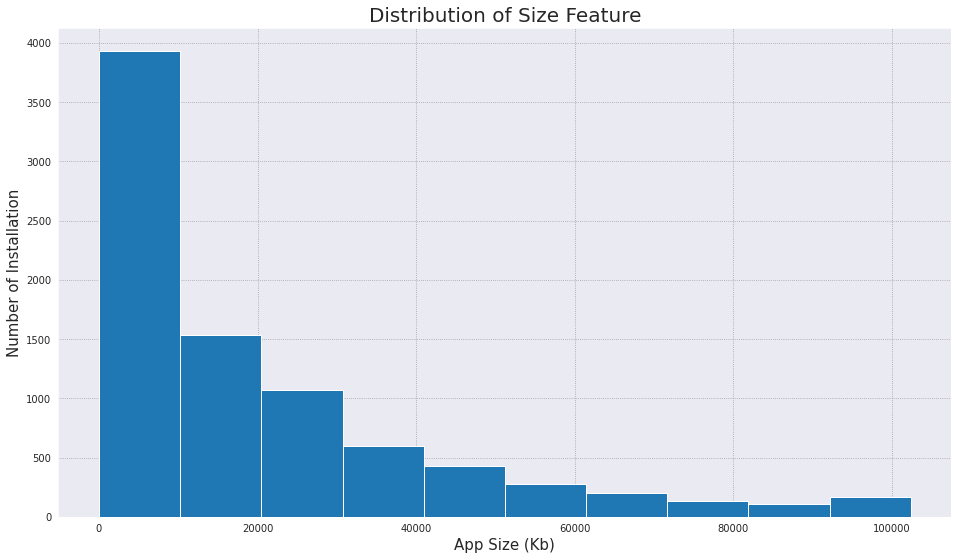

In [ ]:
plt.figure(figsize = (16,9))
plt.hist(df_PlayStore_Updated['Size_'], bins = 10);
plt.xlabel("App Size (Kb)",fontsize = 15)
plt.title("Distribution of Size Feature",fontsize = 20)
plt.ylabel("Number of Installation", fontsize = 15)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## INFERENCE:

App Size is an vital affecting parameters. As you can see in Histogram
1. As you can see that if The size of app indirectly propotional to No. of Installation.

2. If the size of app is less than or equal to 10MB then there is high chance to install that application.


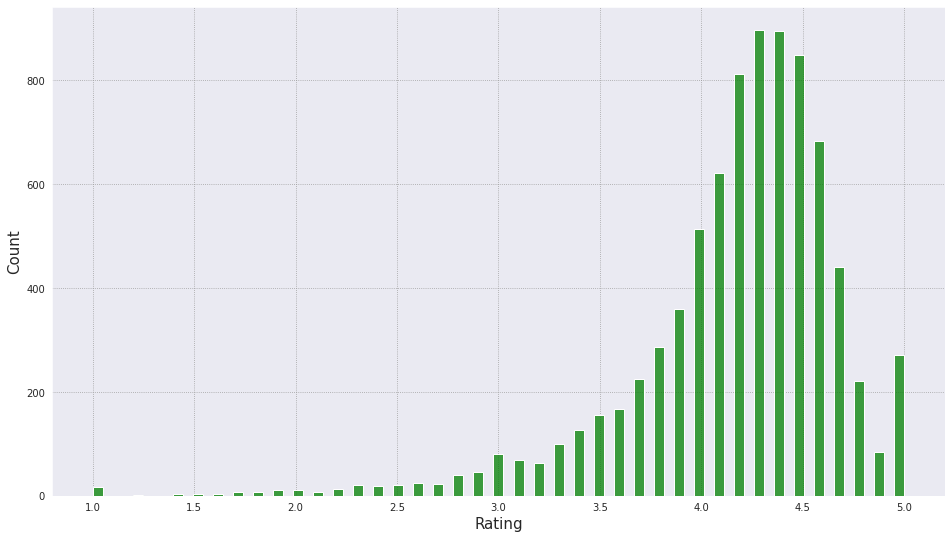

In [ ]:
plt.figure(figsize = (16,9))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.histplot(x = 'Rating', data = df_PlayStore_Updated, color='green');
plt.xlabel("Rating",fontsize = 15)
plt.ylabel("Count",fontsize = 15);

## INFERENCE:
* From the data Analysis, it can be inferred that the maximum no. of downloads 
is between 4.0 to 4.7.

In [ ]:
df_PlayStore_Updated['Price'].unique()

array(['0', '$3.99', '$5.99', '$3.95', '$2.99', '$6.99', '$12.99',
       '$24.99', '$0.99', '$1.99', '$4.99', '$5.49', '$1.49', '$29.99',
       '$4.59', '$19.99', '$8.99', '$2.49', '$3.49', '$10.00', '$9.99',
       '$15.46', '$4.49', '$3.04', '$46.99', '$2.00', '$154.99',
       '$109.99', '$14.99', '$7.99', '$4.85', '$14.00', '$1.96', '$19.40',
       '$3.90', '$17.99', '$3.08', '$4.80', '$2.59', '$89.99', '$200.00',
       '$30.99', '$3.61', '$399.99', '$394.99', '$1.26', '$2.56', '$6.49',
       '$1.04', '$16.99', '$1.20', '$1.00', '$3.28', '$2.60', '$4.60',
       '$4.29', '$13.99', '$8.49', '$2.95', '$2.90', '$1.97', '$28.99',
       '$10.99', '$39.99', '$74.99', '$11.99', '$79.99', '$15.99',
       '$33.99', '$1.50', '$7.49', '$9.00', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$1.29', '$5.00', '$1.75', '$19.90',
       '$1.70', '$25.99', '$3.88', '$1.61', '$2.50', '$1.59', '$400.00',
       '$1.76', '$4.77', '$4.84', '$3.02'], dtype=object)

In [ ]:
def price_formating(x):
  """
  take a price in dollor then return price wothout dollor sign in float format only
  """
  if x == '0':
    return int(x)
  x = x[1:]
  return float(x)  

In [ ]:
df_PlayStore_Updated['Price_Without_Dollor'] = df_PlayStore_Updated['Price'].apply(price_formating)

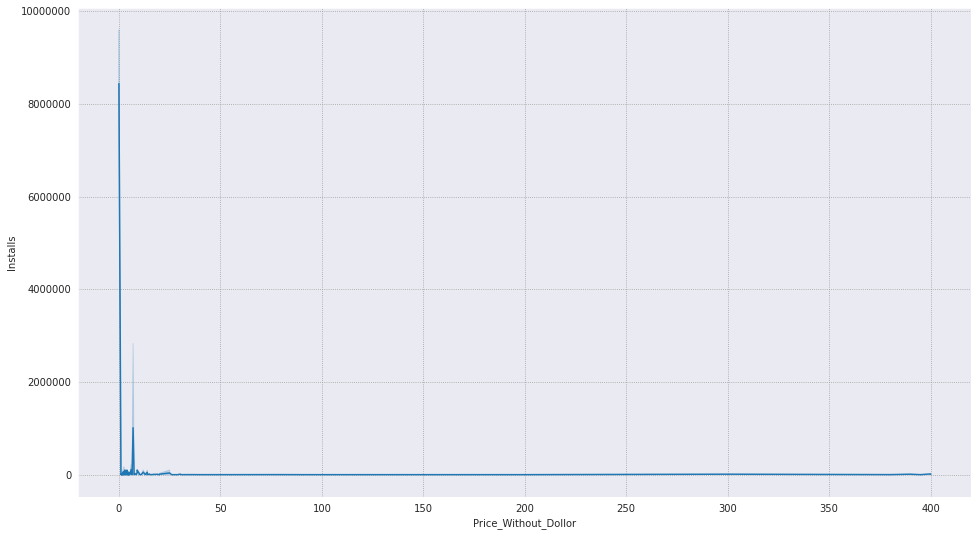

In [ ]:
plt.figure(figsize = (16,9))
ax = sns.lineplot(x = 'Price_Without_Dollor', y= 'Installs', data = df_PlayStore_Updated)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

## INFERENCE:
1. if the app is free to use then there is high probability to install
2. Paid apps are less likely to be installed.
3. For the paid apps category maximum Installations are upto 20 dollars.

In [ ]:
df_PlayStore_Updated['Last Updated'].dtype

dtype('<M8[ns]')

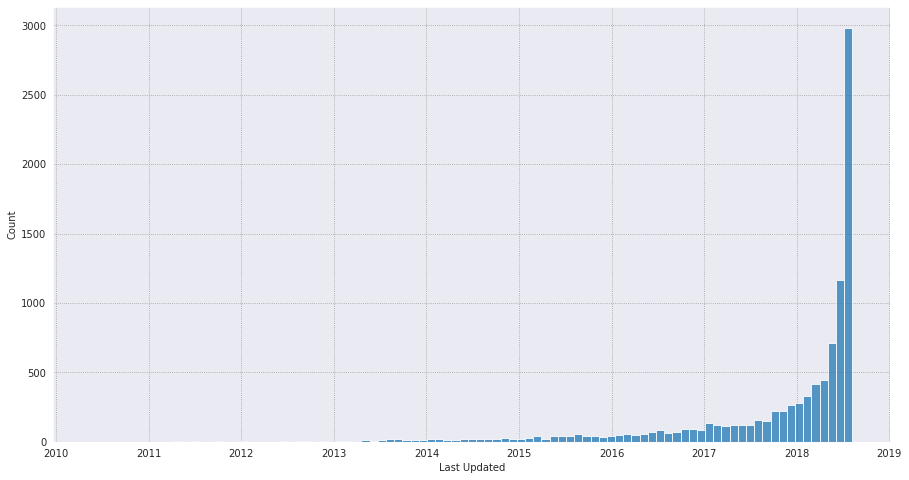

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8 # by adding this we do not need to write size again and again
sns.histplot(x = 'Last Updated', data = df_PlayStore_Updated);

INFERENCE:
1. if Developers are updating theirs app regularly then there is high chance to install.
2. As you can see in Histplot. developers should give updates after within 1 and 2 years.

### <u>3. Exploring the top 5 highest rated free and paid apps.</u>

In [ ]:
df_PlayStore_Updated['Rating'].isnull().sum()

1463

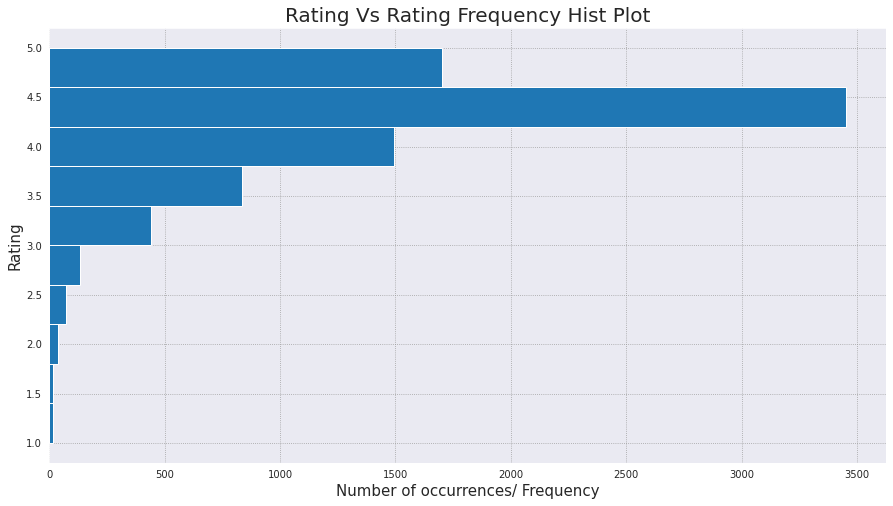

In [ ]:
ax = df_PlayStore_Updated['Rating'].plot(kind = 'hist', figsize = (15,8),orientation="horizontal");
ax.set_xlabel("Number of occurrences/ Frequency", fontsize = 15)
ax.set_ylabel("Rating", fontsize = 15)
ax.set_title("Rating Vs Rating Frequency Hist Plot", fontsize = 20);
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [ ]:
df_PlayStore_Updated['Type'].head(10)

0    Free
1    Free
2    Free
3    Free
4    Free
5    Free
6    Free
7    Free
8    Free
9    Free
Name: Type, dtype: object

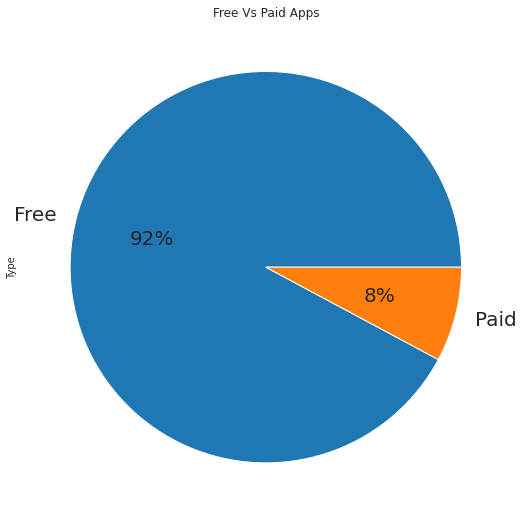

In [ ]:
df_PlayStore_Updated['Type'].value_counts().plot.pie(figsize = (20,9), title = 'Free Vs Paid Apps',
            fontsize=20, autopct='%1.0f%%');


In [ ]:
# Top -5 Highest Rated free Apps
max_rating = df_PlayStore_Updated['Rating'].max()
# print(max_rating)
df_PlayStore_Updated[(df_PlayStore_Updated['Type'] == 'Free') & (df_PlayStore_Updated['Rating'] == max_rating )].head().sort_values(by = 'Rating', ascending=False)[['App','Category'	,'Rating','Type']].reset_index(drop = True)


,App,Category,Rating,Type
0,DF Glue Board,PARENTING,5.0,Free
1,CN Resident,FAMILY,5.0,Free
2,CL Strength,HEALTH_AND_FITNESS,5.0,Free
3,Color CL,LIFESTYLE,5.0,Free
4,CP Trivia,GAME,5.0,Free


##<u> Top 5 Highest Rated Free Apps</u>

1. DF Glue Board
2. CN Resident	
3. CL Strength
4. Color CL	
5. CP Trivia


In [ ]:
# Top -5 Highest Rated Paid Apps
max_rating = df_PlayStore_Updated['Rating'].max()
# print(max_rating)
df_PlayStore_Updated[(df_PlayStore_Updated['Type'] == 'Paid') & (df_PlayStore_Updated['Rating'] == max_rating )].head().sort_values(by = 'Rating', ascending=False)[['App','Category'	,'Rating','Type']].reset_index(drop = True)


,App,Category,Rating,Type
0,USMLE Step 2 CK Flashcards,FAMILY,5.0,Paid
1,211:CK,GAME,5.0,Paid
2,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,Paid
3,Morse Player,FAMILY,5.0,Paid
4,AC DC Power Monitor,LIFESTYLE,5.0,Paid


## <u>Top 5 Highest Rated Paid Apps</u>

1. USMLE Step 2 CK Flashcards
2. 211:CK
3. 30WPM Amateur ham radio Koch CW Morse code tra...	
4. Morse Player
5. AC DC Power Monitor	

##<u> 4. Exploring the avg rating for each category.</u>

In [ ]:
avg_rating = df_PlayStore_Updated['Rating'].mean() 

In [ ]:
df_PlayStore_Updated['Category'].unique()

array(['GAME', 'EDUCATION', 'SPORTS', 'COMMUNICATION', 'SHOPPING',
       'PHOTOGRAPHY', 'ENTERTAINMENT', 'SOCIAL', 'FAMILY',
       'FOOD_AND_DRINK', 'TOOLS', 'VIDEO_PLAYERS', 'FINANCE',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'PERSONALIZATION', 'MEDICAL', 'PRODUCTIVITY', 'TRAVEL_AND_LOCAL',
       'DATING', 'MAPS_AND_NAVIGATION', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'COMICS', 'ART_AND_DESIGN', 'BUSINESS', 'WEATHER',
       'BOOKS_AND_REFERENCE', 'PARENTING', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'EVENTS'], dtype=object)

In [ ]:
df_cat_rat = df_PlayStore_Updated.groupby('Category').agg({'Rating':'mean'}).reset_index().sort_values(by = 'Rating', ascending = False)

In [ ]:
df_cat_rat.reset_index(drop = True).head(10)

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.364407
2,ART_AND_DESIGN,4.357377
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,SOCIAL,4.247291
8,GAME,4.246820
9,WEATHER,4.243056


In [ ]:
df_top_10 = df_cat_rat.head(10)

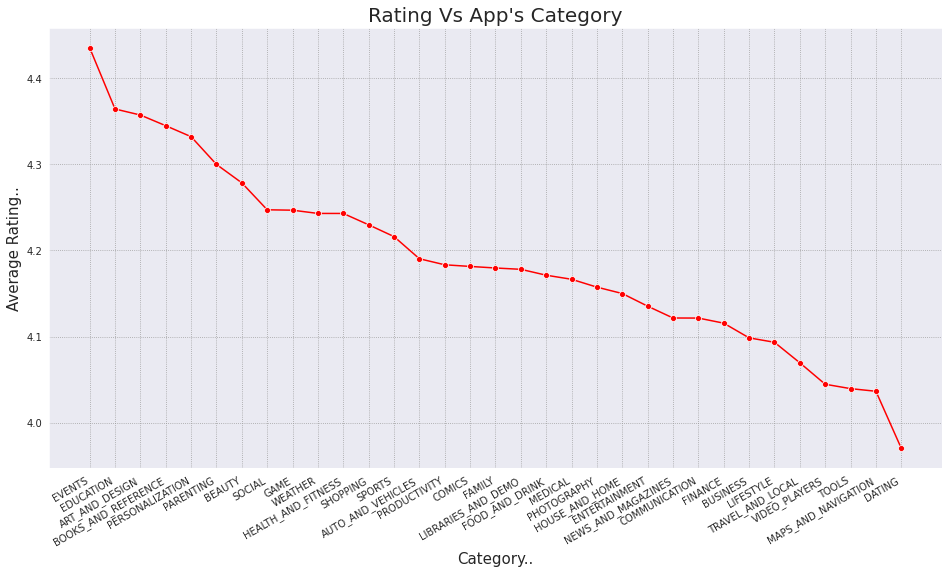

In [ ]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x = 'Category', y = 'Rating',data = df_cat_rat, color="red", marker='o')
fig.autofmt_xdate()
plt.xlabel("Category..", fontsize = 15)
plt.ylabel("Average Rating..", fontsize = 15)
plt.title("Rating Vs App's Category", fontsize = 20);

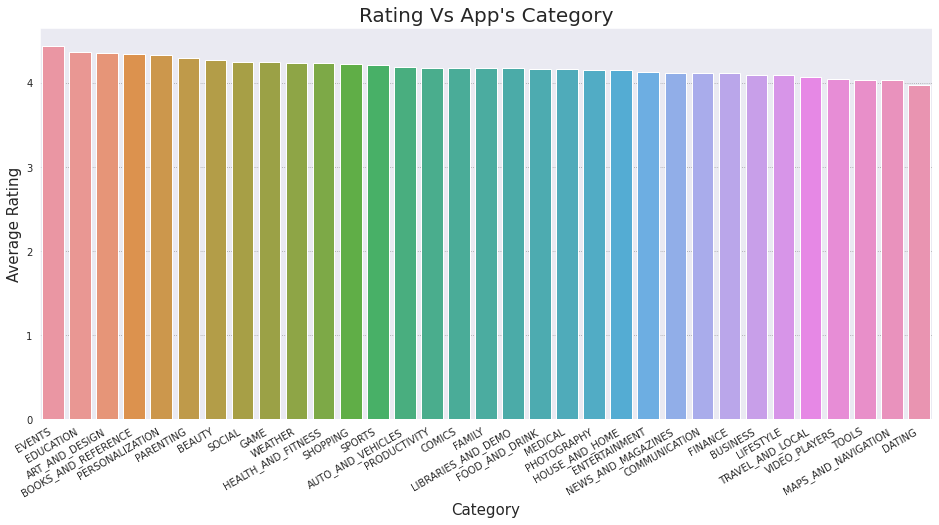

In [ ]:
fig = plt.figure(figsize = (16,8))
p = sns.barplot(x = 'Category', y = 'Rating', data = df_cat_rat,ci=None)
plt.xlabel("Category", fontsize = 15)
plt.ylabel("Average Rating", fontsize = 15)
plt.title("Rating Vs App's Category", fontsize = 20);
fig.autofmt_xdate()

## INFERENCE:
1. As we can see that We found the Average Rating of each category. and also you can see that Maximum Average of Category is EVENTS.
2. I applied the groupby method to find the Average Rating of each category.


### <u>5. Understanding the sentiment polarity of the users.</u>

In [ ]:
pd.set_option("display.max_rows",None)
df_UserReview.tail(10)
#After the index no. 64231 all the features values are NaN. So I am dropping those records after has equal or greater than index 64231

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
miss = df_UserReview.isnull().sum().sort_values(ascending = False)
per = df_UserReview.isnull().mean().sort_values(ascending = False)
pd.concat([miss,round(per*100,3)],keys = ['Missing_Values','Percentage'], axis = 1)

,Missing_Values,Percentage
Translated_Review,26868,41.789
Sentiment,26863,41.781
Sentiment_Polarity,26863,41.781
Sentiment_Subjectivity,26863,41.781
App,0,0.000


In [ ]:
row_to_remove = list(df_UserReview[64231:]['App'].reset_index()['index'])

In [ ]:
df_UserReview_Updated = df_UserReview.drop(index = row_to_remove, axis = 0)

In [ ]:
df_UserReview_Updated.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.25
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.00
64228,Housing-Real Estate & Property,NaN,NaN,NaN,NaN
64229,Housing-Real Estate & Property,NaN,NaN,NaN,NaN
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.40


In [ ]:
miss = df_UserReview_Updated.isnull().sum().sort_values(ascending = False)
per = df_UserReview_Updated.isnull().mean().sort_values(ascending = False)
pd.concat([miss,round(per*100,3)],keys = ['Missing_Values','Percentage'], axis = 1)

,Missing_Values,Percentage
Translated_Review,26804,41.731
Sentiment,26799,41.723
Sentiment_Polarity,26799,41.723
Sentiment_Subjectivity,26799,41.723
App,0,0.000


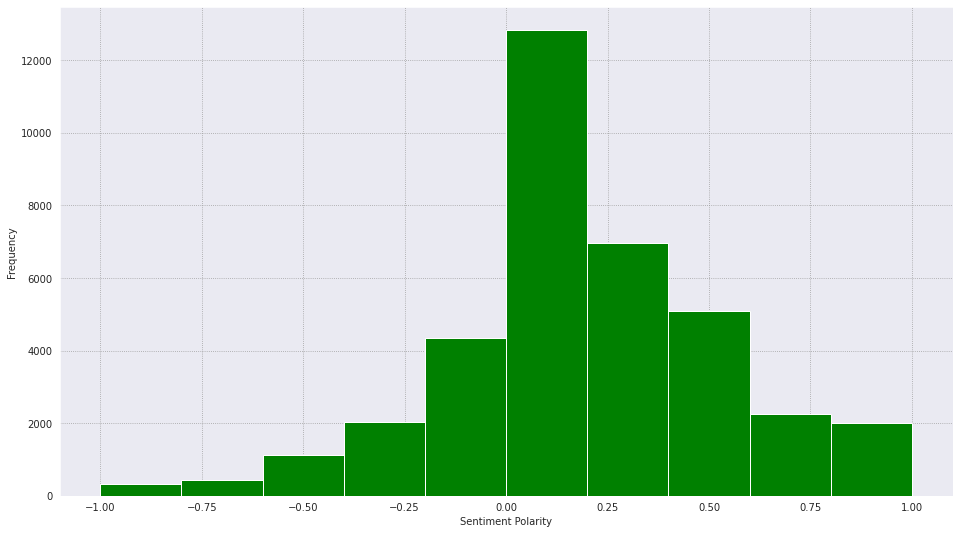

In [ ]:
ax = df_UserReview_Updated['Sentiment_Polarity'].plot(kind = 'hist',figsize = (16,9), color = 'green');
ax.set_xlabel("Sentiment Polarity", fontsize = 10);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


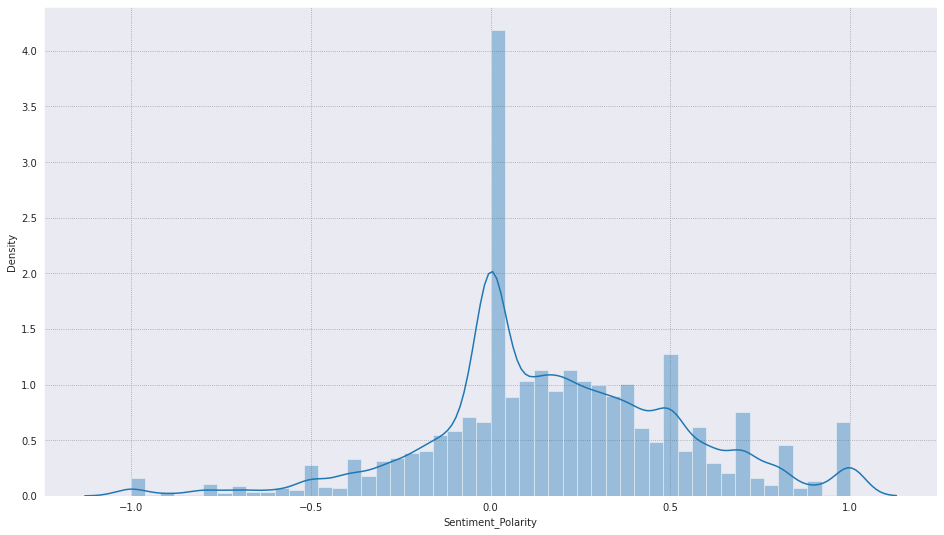

In [ ]:
plt.figure(figsize= (16,9))
sns.distplot(a = df_UserReview['Sentiment_Polarity'],norm_hist = True);

In [ ]:
df_UserReview_Updated.shape

(64231, 5)

In [ ]:
# just Sentiment_Polarity fill by mean
df_UserReview_Updated['Sentiment_Polarity'] = df_UserReview_Updated['Sentiment_Polarity'].fillna(df_UserReview_Updated['Sentiment_Polarity'].mean())

## INFERENCE:
1. (Amximumn Apps) Around  40000 apps reviews Sentiment polarity lies between 0.0 to .18 (Neutral to towards Positive)
2. Around 3000 apps reviews Sentiment Ploarity lies between -1 to 0.0 means About 3000 apps have negative sentiment polarity.
3. Mostly Apps Sentiment polarity lies between -0.47 to +.8

In [ ]:
corr_ = df_UserReview_Updated[['Sentiment_Polarity','Sentiment_Subjectivity']].corr()

In [ ]:
corr_

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


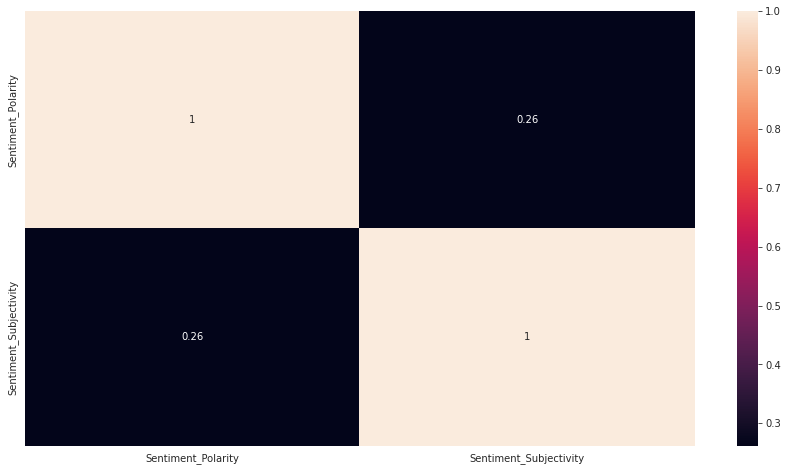

In [ ]:
# Plot a heat map
sns.heatmap(corr_, annot = True);

In [ ]:
corr_ = df_PlayStore_Updated[['Installs','Rating']].corr()

In [ ]:
corr_

,Installs,Rating
Installs,1.000000,0.040145
Rating,0.040145,1.000000


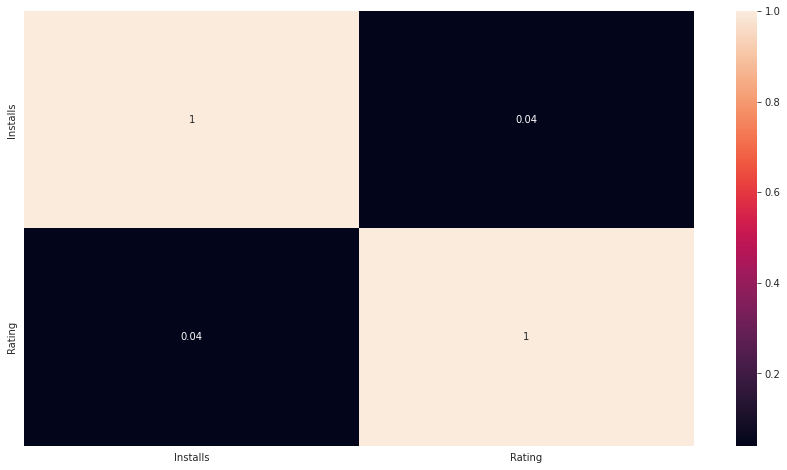

In [ ]:
sns.heatmap(corr_, annot = True);